<a href="https://colab.research.google.com/github/Astenik/Astenik/blob/main/r_approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

# uploat image
uploaded = files.upload()

Saving Hydrangeas.jpg to Hydrangeas.jpg


Shape of the 2D image matrix: (768, 1024)


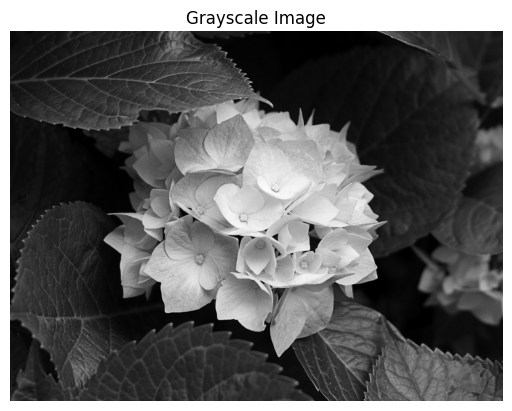

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image and convert to grayscale using cv2
image = cv2.imread("Hydrangeas.jpg", cv2.IMREAD_GRAYSCALE)

# Convert image to 2D matrix
image_matrix = np.array(image, dtype=np.float32)

# Display image matrix and its shape
print("Shape of the 2D image matrix:", image.shape)

# Display the image for verification
plt.imshow(image_matrix, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

In [22]:
import numpy as np
from scipy.linalg import null_space

# Computing SVD
def SVD(A):
  # Assume matrix A has dimensions m x n, where m >= n
  m, n = A.shape
  if m < n:
    return 0 # SVD decomposition assumes m >= n; return 0 if this condition isn't met.

  # Compute A^T * A (this is symmetric and allows us to find right singular vectors)
  S = np.matmul(np.transpose(A), A)

  # Compute eigenvalues and eigenvectors of A^T * A
  eigenvalues, V = np.linalg.eig(S)

  # Compute singular values
  singular_values = np.sqrt(eigenvalues)

  # Sort singular values in descending order and reorder eigenvectors accordingly
  sorted_indices = np.argsort(singular_values)[::-1]
  singular_values_sorted = singular_values[sorted_indices]
  V = V[:, sorted_indices]

  # Create an empty diagonal matrix (m x n) to hold singular values
  Sigma = np.zeros((m, n))

  # Fill the diagonal with the sorted singular values
  np.fill_diagonal(Sigma, singular_values_sorted)

  # Compute U from AV * Sigma^{-1}
  U = np.zeros((m, m))
  AV = np.matmul(A, V)

  # Normalize AV by singular values to compute U (left singular vectors)
  for i in range(m):
    for j in range(n):
      U[i][j] = AV[i][j] * (singular_values[j]**(-1)) # Division by singular value

  # Compute orthogonal complement for the remaining columns of U
  ort_vectors = null_space(U[:, :n].T)
  U[:, n:] = ort_vectors

  return U, Sigma, V.T # Return U, Sigma, and V^T

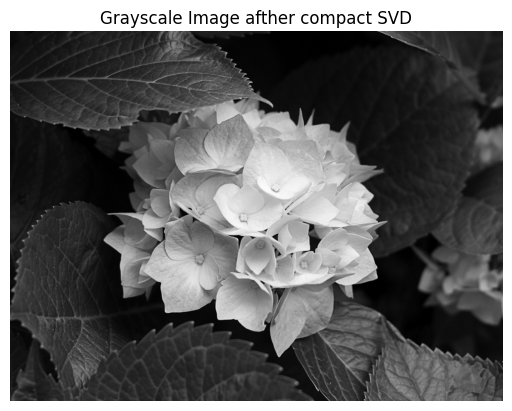

In [24]:
# Get the shape of the image matrix (rows x columns)
m, n = image_matrix.shape

U, Sigma, Vt = 0, 0, 0 # Initialize SVD matrices
if m >= n:
  U, Sigma, Vt = SVD(image_matrix) # Perform SVD directly if rows >= columns
else:
  # If rows < columns, take the transpose of the image matrix
  Ut, Sigmat, Vtt = SVD(np.transpose(image_matrix))

  # Transpose components to adjust for the SVD result of the transposed matrix
  U = Vtt.T
  Vt = Ut.T
  Sigma = Sigmat.T

# Full SVD is done: image_matrix = U * Sigma * Vt
# Now we compute the compact SVD

Sigma_m, U_m, Vt_m = 0, 0, 0 # Initialize compact SVD matrices
if m >= n:
  Sigma_m = Sigma[:n, :] # Keep only the top n rows of Sigma
  U_m = U[:, :n] # Keep only the first n columns of U
  Vt_m = Vt # Vt remains unchanged
else:
  Sigma_m = Sigma[:, :m]
  U_m = U
  Vt_m = Vt[:m, :]

# Reconstruct the image using compact SVD
image_matrix_m = np.matmul(U_m, np.matmul(Sigma_m, Vt_m))

# Display Grayscale Image after compact SVD
plt.imshow(image_matrix_m, cmap='gray')
plt.title("Grayscale Image afther compact SVD")
plt.axis('off')
plt.show()

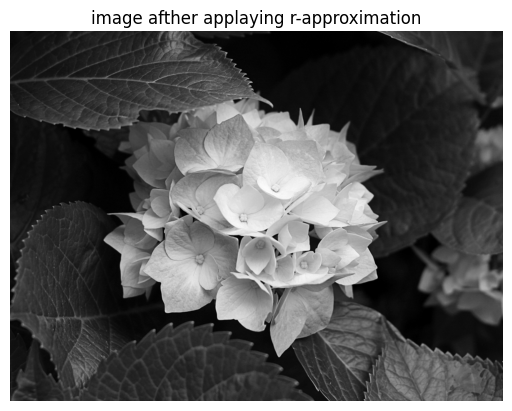

In [26]:
r = m - 10 # Desired rank for approximation

# Extract the first r singular values and corresponding singular vectors
Sigma_r = Sigma_m[:r, :r] # Top r singular values
U_r = U_m[:, :r]  # Top r left singular vectors
Vt_r = Vt_m[:r, :] # Top r right singular vectors

# Reconstruct the r-rank approximation of the image
image_matrix_r = np.matmul(U_r, np.matmul(Sigma_r, Vt_r))

# Display the image after r-approximation
plt.imshow(image_matrix_r, cmap='gray')
plt.title("image afther applaying r-approximation")
plt.axis('off')
plt.show()

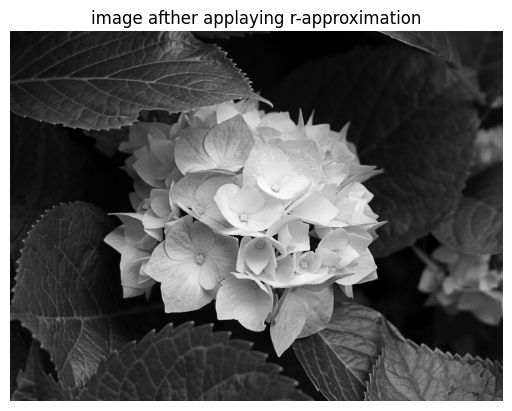

In [28]:
# computing r-approximation for r = m - 150
r = m - 150 # Desired rank for approximation

# Extract the first r singular values and corresponding singular vectors
Sigma_r = Sigma_m[:r, :r] # Top r singular values
U_r = U_m[:, :r]  # Top r left singular vectors
Vt_r = Vt_m[:r, :] # Top r right singular vectors

# Reconstruct the r-rank approximation of the image
image_matrix_r = np.matmul(U_r, np.matmul(Sigma_r, Vt_r))

# Display the image after r-approximation
plt.imshow(image_matrix_r, cmap='gray')
plt.title("image afther applaying r-approximation")
plt.axis('off')
plt.show()

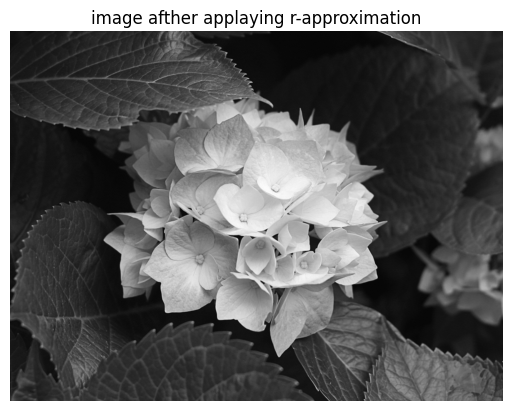

In [33]:
# computing r-approximation for r = m / 2

r = int(m / 2) # Desired rank for approximation

# Extract the first r singular values and corresponding singular vectors
Sigma_r = Sigma_m[:r, :r] # Top r singular values
U_r = U_m[:, :r]  # Top r left singular vectors
Vt_r = Vt_m[:r, :] # Top r right singular vectors

# Reconstruct the r-rank approximation of the image
image_matrix_r = np.matmul(U_r, np.matmul(Sigma_r, Vt_r))

# Display the image after r-approximation
plt.imshow(image_matrix_r, cmap='gray')
plt.title("image afther applaying r-approximation")
plt.axis('off')
plt.show()

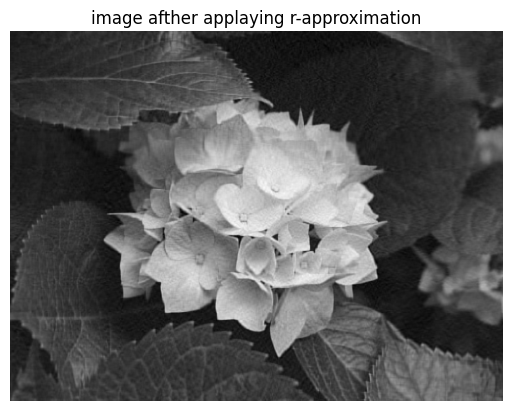

In [41]:
# computing r-approximation for r = m / 10

r = int(m / 10) # Desired rank for approximation

# Extract the first r singular values and corresponding singular vectors
Sigma_r = Sigma_m[:r, :r] # Top r singular values
U_r = U_m[:, :r]  # Top r left singular vectors
Vt_r = Vt_m[:r, :] # Top r right singular vectors

# Reconstruct the r-rank approximation of the image
image_matrix_r = np.matmul(U_r, np.matmul(Sigma_r, Vt_r))

# Display the image after r-approximation
plt.imshow(image_matrix_r, cmap='gray')
plt.title("image afther applaying r-approximation")
plt.axis('off')
plt.show()

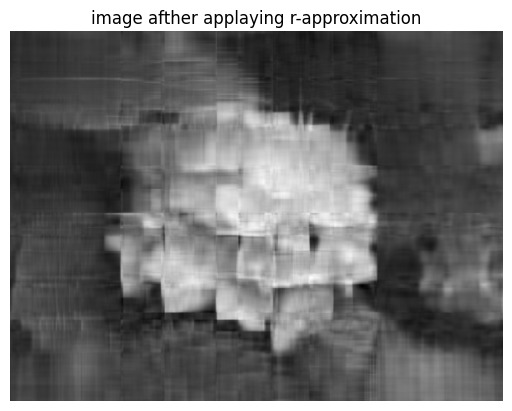

In [39]:
# computing r-approximation for r = m / 50
r = int(m / 50) # Desired rank for approximation

# Extract the first r singular values and corresponding singular vectors
Sigma_r = Sigma_m[:r, :r] # Top r singular values
U_r = U_m[:, :r]  # Top r left singular vectors
Vt_r = Vt_m[:r, :] # Top r right singular vectors

# Reconstruct the r-rank approximation of the image
image_matrix_r = np.matmul(U_r, np.matmul(Sigma_r, Vt_r))

# Display the image after r-approximation
plt.imshow(image_matrix_r, cmap='gray')
plt.title("image afther applaying r-approximation")
plt.axis('off')
plt.show()

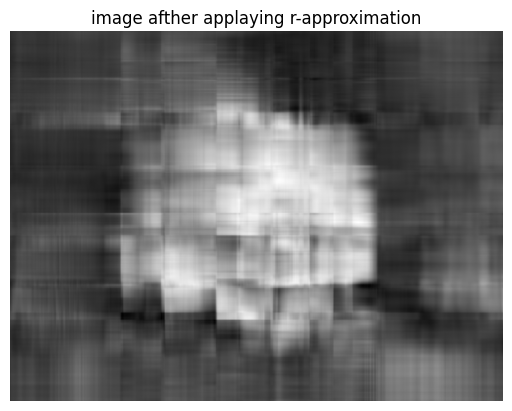

In [40]:
# computing r-approximation for r = m / 100

r = int(m / 100) # Desired rank for approximation

# Extract the first r singular values and corresponding singular vectors
Sigma_r = Sigma_m[:r, :r] # Top r singular values
U_r = U_m[:, :r]  # Top r left singular vectors
Vt_r = Vt_m[:r, :] # Top r right singular vectors

# Reconstruct the r-rank approximation of the image
image_matrix_r = np.matmul(U_r, np.matmul(Sigma_r, Vt_r))

# Display the image after r-approximation
plt.imshow(image_matrix_r, cmap='gray')
plt.title("image afther applaying r-approximation")
plt.axis('off')
plt.show()